<a href="https://colab.research.google.com/github/thoufiqz55/Churn_modelling/blob/main/ANN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X=X.drop(['Geography','Gender'],axis=1 )

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
 X=pd.concat([X,geography,gender],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ANN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [15]:
#initialising the ANN
classifier=Sequential()

In [16]:
#adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [18]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [19]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 7s 5ms/step - loss: 2.2411 - accuracy: 0.7552 - val_loss: 1.7287 - val_accuracy: 0.7062
Epoch 2/50
536/536 [==============================] - 2s 5ms/step - loss: 1.3552 - accuracy: 0.7333 - val_loss: 1.3025 - val_accuracy: 0.7380
Epoch 3/50
536/536 [==============================] - 2s 5ms/step - loss: 0.9915 - accuracy: 0.7305 - val_loss: 0.9019 - val_accuracy: 0.7372
Epoch 4/50
536/536 [==============================] - 3s 5ms/step - loss: 0.7045 - accuracy: 0.7654 - val_loss: 0.6040 - val_accuracy: 0.7683
Epoch 5/50
536/536 [==============================] - 3s 5ms/step - loss: 0.5316 - accuracy: 0.7957 - val_loss: 0.5325 - val_accuracy: 0.7940
Epoch 6/50
536/536 [==============================] - 3s 5ms/step - loss: 0.4780 - accuracy: 0.8119 - val_loss: 0.4907 - val_accuracy: 0.8073
Epoch 7/50
536/536 [==============================] - 2s 5ms/step - loss: 0.4594 - accuracy: 0.8171 - val_loss: 0.4650 - val_accuracy: 0.8133
Epoch 

In [21]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


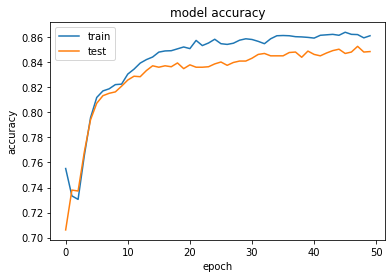

In [23]:
#summaries history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

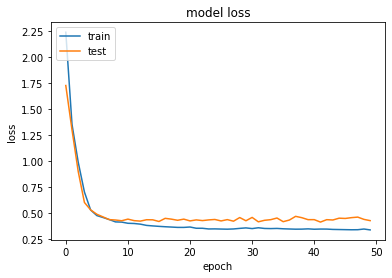

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1498,   97],
       [ 199,  206]])

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
score

0.852